# Algoritma Deep Learning dan Kebutuhan Data Pelatihan

### Kelaparan Data pada Algoritma Deep Learning
Algoritma **Deep Learning** memiliki kebutuhan besar akan data pelatihan. Mereka sering kali bekerja paling baik ketika tersedia banyak data berlabel untuk dimasukkan ke dalam **training set**. Banyak tim berusaha memasukkan data apa pun yang tersedia ke dalam **training set**, bahkan jika data tersebut tidak berasal dari distribusi yang sama dengan **dev** dan **test data**.

### Tantangan Distribusi Data yang Berbeda
Di era **deep learning**, semakin banyak tim melatih model mereka pada data yang berasal dari distribusi yang berbeda dari **dev** dan **test set**. Ada beberapa kehalusan dan praktik terbaik dalam menangani kasus ini.

### Studi Kasus: Aplikasi Pengklasifikasi Gambar Kucing
Bayangkan Anda membangun aplikasi mobile untuk mengklasifikasi gambar kucing. Anda memiliki dua sumber data:
1. **Data dari aplikasi mobile** (gambar amatir).
2. **Data dari web** (gambar profesional).

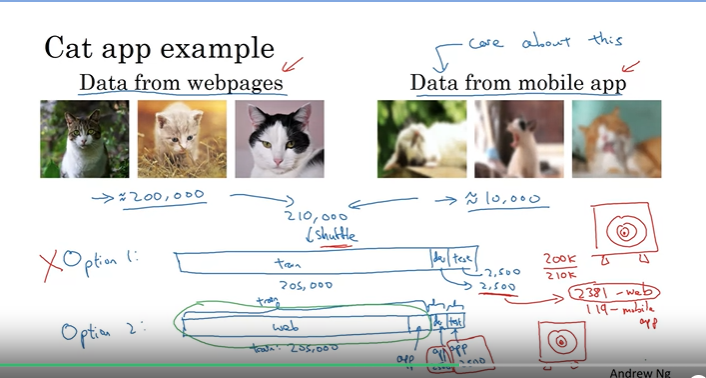

Anda memiliki 10.000 gambar dari aplikasi, tetapi bisa mendapatkan 200.000 gambar dari web. Anda perlu memutuskan apakah ingin:
- Menggabungkan data ini (total 210.000 gambar), atau
- Memisahkannya sehingga **dev** dan **test set** hanya berisi data dari aplikasi mobile.

### Pendekatan Pembagian Data
1. **Opsi 1:** Gabungkan data menjadi 210.000 gambar, dengan 205.000 untuk **training set**, dan masing-masing 2.500 untuk **dev** dan **test set**. Kelebihan: semua set berasal dari distribusi yang sama. Kekurangan: sebagian besar **dev set** berasal dari web, yang bukan distribusi yang Anda inginkan.
2. **Opsi 2:** Gunakan 200.000 gambar dari web dan 5.000 gambar dari aplikasi untuk **training set**, sementara **dev** dan **test set** hanya berisi gambar dari aplikasi mobile.

### Rekomendasi Pembagian Data
Dianjurkan untuk memilih opsi kedua agar **dev set** menggambarkan target sebenarnya. Dengan cara ini, tim Anda akan tahu bahwa tujuan utama adalah meningkatkan performa pada distribusi gambar dari aplikasi.

---

### Studi Kasus Lain: Sistem Pengaktifan Suara
Misalkan Anda membangun **sistem pengenalan suara** untuk kaca spion mobil yang dapat mendeteksi perintah navigasi. Anda mungkin memiliki banyak data dari aplikasi pengenalan suara lainnya (500.000 suara), tetapi sedikit data spesifik untuk kaca spion. Anda dapat:
1. Menggunakan 500.000 suara dari aplikasi lain sebagai **training set**, dengan **dev** dan **test set** hanya dari data kaca spion.
2. Menambahkan sebagian data kaca spion ke dalam **training set** agar lebih beragam.

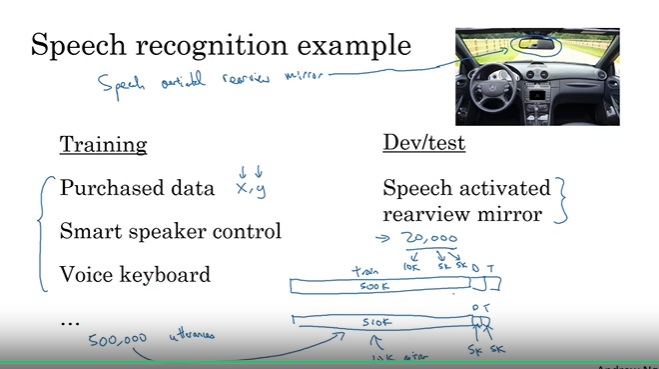

Dengan menggunakan data yang berasal dari distribusi berbeda untuk **training set**, Anda bisa mendapatkan data pelatihan yang lebih banyak, meningkatkan performa algoritma pembelajaran.

---

> **Catatan:** Anda tidak selalu harus menggunakan semua data yang tersedia. Dalam beberapa kasus, membatasi data dapat meningkatkan performa model.



# Menganalisis Bias dan Varians pada Algoritma Pembelajaran

Mengevaluasi bias dan varians pada algoritma pembelajaran sangat membantu dalam memprioritaskan apa yang perlu diperbaiki selanjutnya. Namun, cara Anda menganalisis bias dan varians akan berbeda ketika set pelatihan Anda berasal dari distribusi yang berbeda dengan set dev dan set pengujian. Mari kita lihat lebih lanjut.

## Analisis Bias dan Varians

Misalnya kita masih menggunakan contoh klasifikasi kucing dan katakanlah manusia hampir sempurna dalam mengklasifikasikan gambar tersebut. Jadi, kesalahan Bayes, atau kesalahan optimal Bayes, kita tahu hampir 0% pada masalah ini. Untuk melakukan analisis kesalahan, Anda biasanya melihat kesalahan pada set pelatihan dan juga melihat kesalahan pada set dev. 

Misalkan, dalam contoh ini, kesalahan pelatihan adalah 1%, dan kesalahan pada set dev adalah 10%. Jika data dev berasal dari distribusi yang sama dengan set pelatihan, Anda dapat mengatakan bahwa ada masalah varians yang besar, di mana algoritma tidak dapat menggeneralisasi dengan baik dari set pelatihan (yang berfungsi dengan baik) ke set dev (yang tiba-tiba hasilnya jauh lebih buruk). 

Namun, dalam situasi di mana data pelatihan dan data dev berasal dari distribusi yang berbeda, Anda tidak dapat lagi menarik kesimpulan ini dengan aman. Mungkin algoritma tersebut bekerja baik pada set dev, tetapi set pelatihan terlalu mudah karena gambar dengan resolusi tinggi dan jelas, sementara set dev jauh lebih sulit.

## Membagi Data untuk Analisis yang Lebih Baik

Untuk memisahkan kedua efek ini, kita dapat mendefinisikan data baru yang akan kita sebut sebagai *training-dev set*. Ini adalah subset data yang memiliki distribusi yang sama dengan set pelatihan, namun Anda tidak secara eksplisit melatih jaringan saraf pada data ini.

### Langkah-langkah:
1. Pisahkan *training set* dan *dev set* seperti sebelumnya. Set dev dan set pengujian memiliki distribusi yang sama, namun set pelatihan memiliki distribusi yang berbeda.
2. Acak set pelatihan dan pisahkan sebagian kecil untuk menjadi *training-dev set*. Sama seperti set dev dan pengujian yang memiliki distribusi yang sama, *training set* dan *training-dev set* juga memiliki distribusi yang sama.
3. Latih jaringan saraf hanya pada *training set* yang sebenarnya. Jangan biarkan jaringan saraf menjalankan pelatihan pada *training-dev set*.

## Contoh Kasus

Misalkan kesalahan pada set pelatihan adalah 1%, kesalahan pada *training-dev set* adalah 9%, dan kesalahan pada set dev adalah 10%.

### Apa yang Dapat Kita Simpulkan?
- Ketika Anda beralih dari data pelatihan ke *training-dev data*, kesalahan meningkat cukup banyak.
- Perbedaan antara set pelatihan dan *training-dev data* adalah bahwa jaringan saraf dilatih secara eksplisit pada set pelatihan tetapi tidak pada *training-dev set*. Ini menunjukkan bahwa ada masalah varians karena jaringan saraf tidak menggeneralisasi dengan baik pada data yang berasal dari distribusi yang sama, meskipun telah dilatih pada data pelatihan yang serupa.

### Contoh Lain:
Jika kesalahan pada set pelatihan adalah 1%, kesalahan pada *training-dev set* adalah 1,5%, namun kesalahan pada set dev adalah 10%. Ini menunjukkan bahwa masalahnya bukan pada varians, melainkan masalah *data mismatch*.

## Prinsip Umum dalam Analisis Bias dan Varians

Berikut adalah beberapa prinsip umum yang perlu diperhatikan saat menganalisis bias dan varians:

- **Kesalahan tingkat manusia**: Ini adalah tingkat kesalahan yang dilakukan oleh manusia pada masalah yang sama.
- **Kesalahan pada set pelatihan**: Ini menunjukkan seberapa baik algoritma bekerja pada data yang telah dilatih.
- **Kesalahan pada *training-dev set***: Ini mengindikasikan seberapa baik algoritma menggeneralisasi data yang memiliki distribusi yang sama, namun tidak digunakan untuk pelatihan langsung.
- **Kesalahan pada set dev**: Ini menunjukkan seberapa baik algoritma bekerja pada data yang berasal dari distribusi yang berbeda.

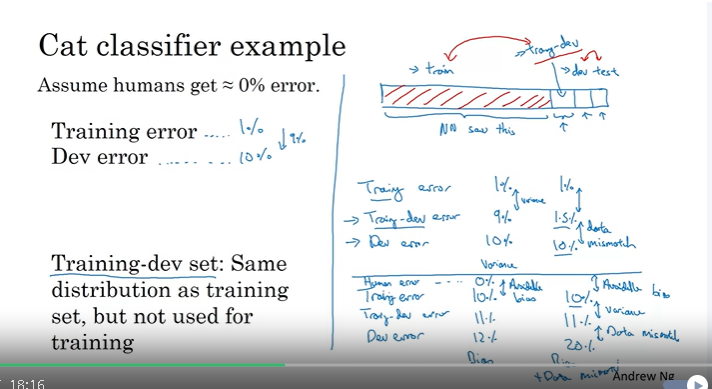

Dari perbedaan antara kesalahan-kesalahan ini, Anda dapat memperkirakan seberapa besar bias yang dapat dihindari, varians, dan masalah *data mismatch* yang ada.

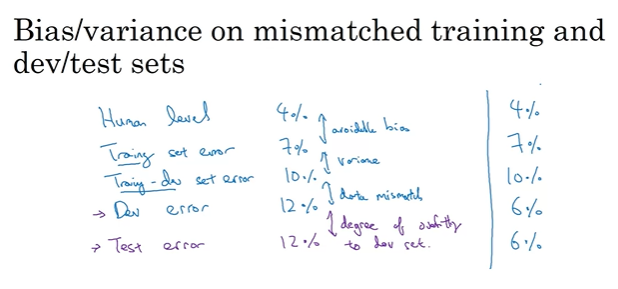

### Contoh Kasus:
- Jika kesalahan manusia adalah 4%, kesalahan pada set pelatihan adalah 7%, kesalahan pada *training-dev set* adalah 10%, dan kesalahan pada set dev adalah 12%, ini memberikan gambaran tentang bias yang dapat dihindari, varians, dan masalah *data mismatch*.
- Jika ada jarak besar antara kesalahan pada set dev dan set pengujian, ini menunjukkan bahwa model mungkin telah terlalu banyak disesuaikan dengan set dev (overfitting).

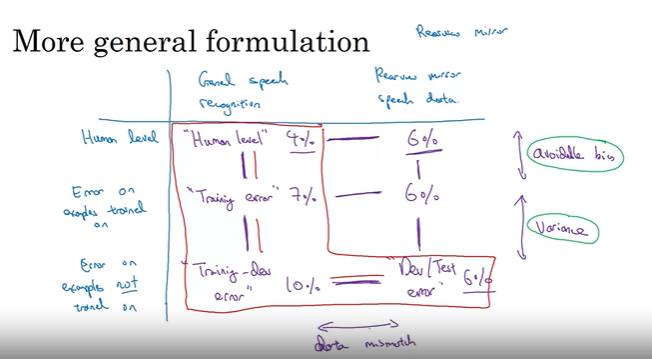

## Menangani Overfitting

Jika ada kesenjangan besar antara kesalahan pada set dev dan set pengujian, Anda mungkin perlu menambah ukuran set dev atau mengevaluasi kembali cara data dikumpulkan untuk mengurangi risiko overfitting.


# Mengatasi Masalah Ketidaksesuaian Data dalam Model Pembelajaran Mesin

Jika set data pelatihan berasal dari distribusi yang berbeda dengan set data dev dan test, dan analisis kesalahan menunjukkan adanya masalah ketidaksesuaian data, apa yang dapat dilakukan? Tidak ada solusi yang sepenuhnya sistematis untuk ini, tetapi mari kita lihat beberapa hal yang dapat Anda coba.

## **Langkah-langkah yang Dapat Dicoba**

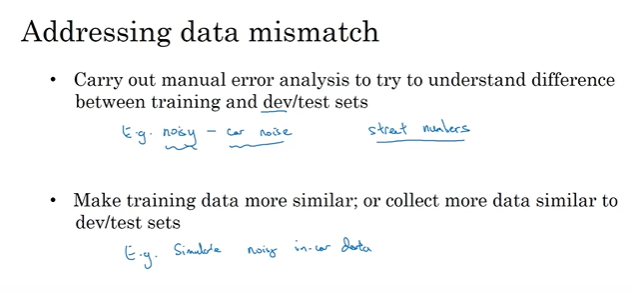

### 1. **Analisis Kesalahan Manual**
   Jika saya menemukan masalah ketidaksesuaian data yang besar, yang biasanya saya lakukan adalah melakukan analisis kesalahan manual dan mencoba memahami perbedaan antara set pelatihan dan set dev/test. 
   
   Untuk menghindari overfitting pada set test, secara teknis, untuk analisis kesalahan, Anda sebaiknya hanya melihat set dev dan bukan set test. 

   Sebagai contoh konkrit, jika Anda sedang membangun aplikasi **speech-activated rear-view mirror** untuk mobil, Anda mungkin mendengarkan contoh dalam set dev untuk mencoba mengetahui bagaimana set dev berbeda dari set pelatihan.

### 2. **Contoh Kasus: Kesalahan Pengakuan Suara**
   Misalnya, Anda mungkin menemukan bahwa banyak contoh dalam set dev sangat berisik dan ada banyak suara mobil. Ini adalah salah satu cara set dev Anda berbeda dari set pelatihan Anda. Mungkin Anda juga menemukan kategori kesalahan lainnya, seperti pengakuan angka jalan yang sering salah.

### 3. **Pemahaman tentang Perbedaan Dev Set**
   Setelah Anda memiliki wawasan tentang sifat kesalahan dalam dev set atau bagaimana dev set bisa lebih sulit dibandingkan dengan set pelatihan, langkah berikutnya adalah mencoba cara untuk membuat data pelatihan lebih mirip dengan dev set. Atau, sebagai alternatif, cobalah untuk mengumpulkan lebih banyak data yang mirip dengan set dev dan test.

### 4. **Simulasi Data untuk Menyesuaikan dengan Set Dev**
   Jika Anda menemukan bahwa kebisingan mobil adalah sumber kesalahan utama, Anda bisa mencoba untuk mensimulasikan data dalam mobil yang berisik.

## **Sintesis Data Buatan**
   Salah satu teknik yang bisa Anda coba adalah **artificial data synthesis** atau sintesis data buatan. Mari kita bahas ini dalam konteks mengatasi masalah kebisingan mobil.

   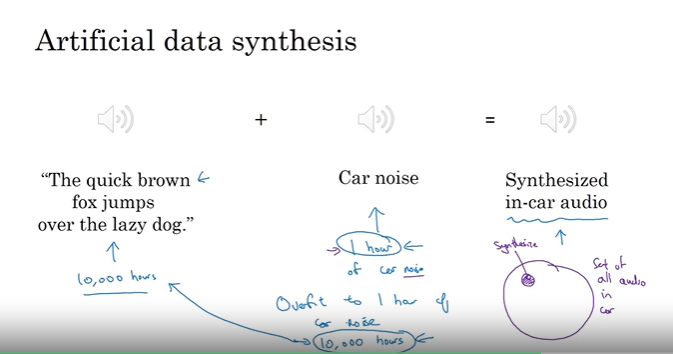

   - Misalnya, Anda memiliki banyak rekaman audio bersih tanpa kebisingan mobil. Anda dapat menggabungkan rekaman ini dengan suara kebisingan mobil untuk mensintesis suara yang menyerupai "The quick brown fox jumps over the lazy dog" yang diucapkan di dalam mobil berisik.
   
   - Ini adalah contoh sintesis audio yang sederhana, tetapi dalam praktiknya, Anda juga bisa mensintesis efek audio lain seperti gema yang terjadi saat suara Anda memantul di dinding mobil.

### 5. **Risiko Overfitting dengan Sintesis Data**
   Namun, perlu diingat bahwa jika Anda hanya memiliki satu jam data kebisingan mobil dan mengulangnya 10.000 kali untuk menambah data pelatihan, ada risiko algoritma pembelajaran Anda akan overfit pada satu jam kebisingan tersebut, meskipun secara manusiawi suara tersebut terdengar normal.

   - **Peringatan:** Sebagai contoh, jika Anda memiliki data kebisingan mobil yang terbatas, Anda mungkin mensintesis data dari subset kecil ruang yang ada, yang dapat menyebabkan overfitting.

## **Contoh Sintesis Data Lainnya: Mobil**
   Jika Anda sedang membangun mobil otonom dan ingin mendeteksi kendaraan, Anda bisa menggunakan **computer graphics** untuk mensintesis gambar mobil.

   - Sintesis gambar mobil menggunakan grafik komputer ini dapat melatih sistem visi komputer untuk mendeteksi mobil.
   - Masalahnya, jika Anda hanya mensintesis 20 mobil berbeda dari video game, sistem Anda mungkin hanya mampu mendeteksi 20 desain mobil tersebut dan **overfit** pada data terbatas ini.

   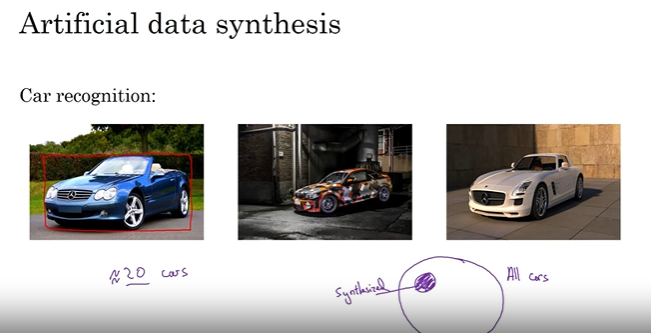

## **Kesimpulan**
   Jika Anda merasa ada masalah ketidaksesuaian data, disarankan untuk melakukan analisis kesalahan dan mencoba memahami perbedaan antara distribusi data pelatihan dan dev set. Setelah itu, coba cari cara untuk mendapatkan lebih banyak data pelatihan yang mirip dengan dev set. Salah satu cara yang dapat dicoba adalah **artificial data synthesis**, yang dapat meningkatkan performa sistem, seperti yang sudah terbukti dalam **speech recognition**. Namun, tetap berhati-hati agar tidak secara tidak sengaja mensintesis data dari subset yang terlalu kecil dari ruang data yang lebih besar.

---
**Catatan:**  
- Jangan ragu untuk mencoba teknik-teknik ini, tetapi perlu diingat bahwa hasilnya mungkin bervariasi tergantung pada jenis masalah yang Anda hadapi.

Sintesis Data Buatan digunakan untuk mengatasi masalah data yang tidak sesuai dengan distribusi data pelatihan. Teknik ini memungkinkan Anda untuk menciptakan data tambahan yang menyerupai data yang hilang, misalnya, dengan menambahkan kebisingan mobil pada rekaman suara bersih.


Risiko Overfitting adalah tantangan yang perlu diperhatikan jika data sintetis hanya berasal dari subset kecil ruang data.